In [72]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7f3e851e76a0>>
Traceback (most recent call last):
  File "/home/pooya/.local/lib/python3.8/site-packages/tornado/ioloop.py", line 905, in _run
    return self.callback()
  File "/home/pooya/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/pooya/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/pooya/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/pooya/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/pooya/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1776, in _draw_fra

In [73]:
data = pd.read_csv("Ads_CTR_Optimisation.csv")
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [74]:
def ucb_function(num_of_rounds, data):
    # number of Ads
    d = len(data.columns)
    selected_ads = []
    num_of_each_ads_selection = [0] * d
    sum_of_rewards_for_each_ads = [0] * d
    total_rewards = 0

    for n in range(0, num_of_rounds):
        winner_ad = 0
        max_ucb = 0
        for i in range(0, d):
            if(num_of_each_ads_selection[i] > 0):
                average_reward = sum_of_rewards_for_each_ads[i] / num_of_each_ads_selection[i]
                delta_i = math.sqrt(3/2 * (math.log(n + 1) / num_of_each_ads_selection[i]))
                ucb = average_reward + delta_i
            else:
                # denominator in the average_reward equation is zero
                ucb = 1e400

            if ucb > max_ucb:
                max_ucb = ucb
                winner_ad = i

        selected_ads.append(winner_ad)
        num_of_each_ads_selection[winner_ad] += 1
        reward = data.values[n, winner_ad]
        sum_of_rewards_for_each_ads[winner_ad] += reward
        total_rewards += reward
    
    return selected_ads

In [75]:
# number of users (rounds)
N_final = len(data)
initial_N = 100
step = 100
selected_ads_history = []
rounds = []
for N in range(initial_N, N_final + 1, step):
    selected_ads_history.append(ucb_function(N, data))
    rounds.append(N)

<IPython.core.display.Javascript object>


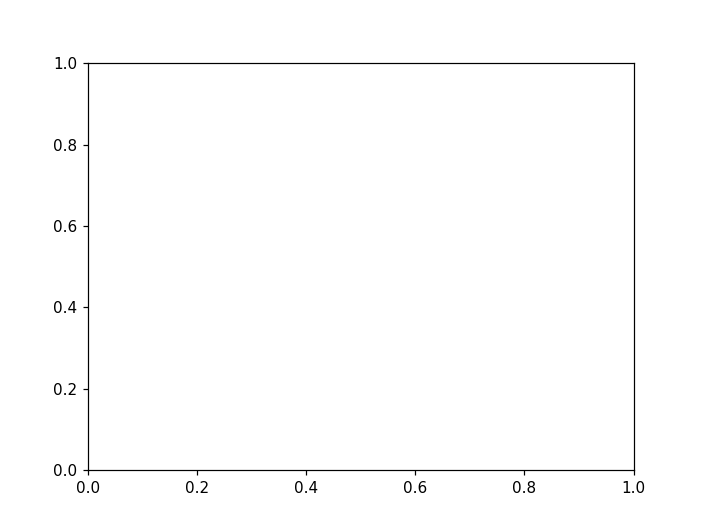

In [76]:
#https://stackoverflow.com/questions/62784289/histogram-animation-in-python

%matplotlib notebook

user_count = N_final
def update(record_id):
    if record_id == user_count:
        a.event_source.stop()
    plt.cla()
    plt.hist(selected_ads_history[record_id])
    plt.gca().set_title('Histogram of ads selections')
    plt.gca().set_ylabel('Number of times each ad was selected')
    plt.gca().set_xlabel('Ads')
    plt.gca().annotate('round={}'.format(record_id), [3, 27])


fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval = len(selected_ads_history))

plt.show()